In [12]:
import numpy as np

In [22]:
def rosenbrock(x):
    return sum(100 * (x[1:]-x[:-1]**2)**2 + (1 - x[:-1])**2)

def rosenbrock_grad(x): 
    grad = np.zeros_like(x)
    grad[:-1] = -400 * x[:-1] * (x[1:] - x[:-1]**2) - 2 * (1 - x[:-1])
    grad[1:] += 200 * (x[1:] - x[:-1]**2)
    return grad

def gradient_descent(learning_rate=0.001, max_iters=10000, tol=1e-6, dims=2):

    x = np.random.rand(dims) * 10 - 5 
    
    for i in range(max_iters):
        grad = rosenbrock_grad(x)
        x = x - learning_rate * grad
        
        # Condición de parada
        if np.linalg.norm(grad) < tol:
            print(f'Convergencia alcanzada en la iteración {i}')
            break
    
    return x

sol_2d = gradient_descent(dims=2)
print("Mínimo encontrado en 2D:", sol_2d)

Mínimo encontrado en 2D: [0.98963414 0.97933399]


Optimización 2D:


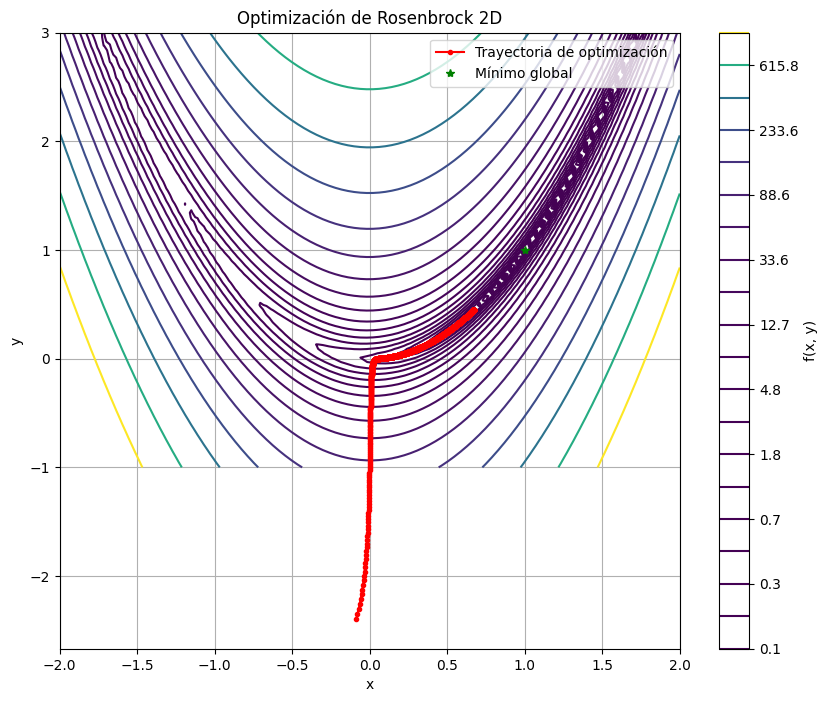

Mínimo encontrado en: [0.67116957 0.44889092]
Valor mínimo: 0.10837835729156137

Optimización 3D:
Mínimo encontrado en: [0.82851606 0.68587075 0.46865014]
Valor mínimo: 0.12842897799656616


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def rosenbrock_2d(x):
    """Función de Rosenbrock en 2D"""
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

def rosenbrock_3d(x):
    """Función de Rosenbrock en 3D"""
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2 + (1 - x[1])**2 + 100 * (x[2] - x[1]**2)**2

def rosenbrock_gradient_2d(x):
    """Gradiente de la función de Rosenbrock en 2D"""
    dx0 = -2 * (1 - x[0]) - 400 * x[0] * (x[1] - x[0]**2)
    dx1 = 200 * (x[1] - x[0]**2)
    return np.array([dx0, dx1])

def rosenbrock_gradient_3d(x):
    """Gradiente de la función de Rosenbrock en 3D"""
    dx0 = -2 * (1 - x[0]) - 400 * x[0] * (x[1] - x[0]**2)
    dx1 = 200 * (x[1] - x[0]**2) - 2 * (1 - x[1]) - 400 * x[1] * (x[2] - x[1]**2)
    dx2 = 200 * (x[2] - x[1]**2)
    return np.array([dx0, dx1, dx2])

def gradient_descent(f, gradient, x0, learning_rate=0.0001, max_iter=10000, tol=1e-6):
    """
    Implementación del descenso del gradiente
    
    Parámetros:
    - f: función objetivo
    - gradient: función que calcula el gradiente
    - x0: punto inicial
    - learning_rate: tasa de aprendizaje
    - max_iter: número máximo de iteraciones
    - tol: tolerancia para la convergencia
    """
    x = x0
    path = [x.copy()]
    
    for i in range(max_iter):
        grad = gradient(x)
        x_new = x - learning_rate * grad
        
        if np.linalg.norm(x_new - x) < tol:
            break
            
        x = x_new
        path.append(x.copy())
    
    return np.array(path), f(x)

# Optimización 2D con visualización
def optimize_and_visualize_2d():
    # Punto inicial aleatorio
    x0 = np.random.randn(2) * 2
    
    # Ejecutar optimización
    path, min_value = gradient_descent(rosenbrock_2d, rosenbrock_gradient_2d, x0)
    
    # Crear grid para visualización
    x = np.linspace(-2, 2, 100)
    y = np.linspace(-1, 3, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    
    for i in range(len(x)):
        for j in range(len(y)):
            Z[j,i] = rosenbrock_2d(np.array([X[j,i], Y[j,i]]))
    
    # Visualizar
    plt.figure(figsize=(10, 8))
    plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 20))
    plt.colorbar(label='f(x, y)')
    plt.plot(path[:,0], path[:,1], 'r.-', label='Trayectoria de optimización')
    plt.plot(1, 1, 'g*', label='Mínimo global')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Optimización de Rosenbrock 2D')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return path[-1], min_value

# Optimización 3D
def optimize_3d():
    # Punto inicial aleatorio
    x0 = np.random.randn(3) * 2
    
    # Ejecutar optimización
    path, min_value = gradient_descent(rosenbrock_3d, rosenbrock_gradient_3d, x0)
    
    return path[-1], min_value

# Ejecutar optimizaciones
print("Optimización 2D:")
x_min_2d, f_min_2d = optimize_and_visualize_2d()
print(f"Mínimo encontrado en: {x_min_2d}")
print(f"Valor mínimo: {f_min_2d}")

print("\nOptimización 3D:")
x_min_3d, f_min_3d = optimize_3d()
print(f"Mínimo encontrado en: {x_min_3d}")
print(f"Valor mínimo: {f_min_3d}")